# Robert's First Lab Assignment for Nano 281

## Q1 - Materials Project data

In [1]:
#import necessary packages
from pymatgen import MPRester
import numpy as np
import seaborn as sns
from scipy import stats
from pprint import pprint
import pandas as pd
from io import StringIO
import requests
%matplotlib inline
#set up Materials Project query method with API Key
m = MPRester("Rxy9xMBBfweUTh2XbOv")

**Testing method of getting ABO3s**

In [2]:
test_data = m.get_data("**O3", prop="pretty_formula")
#pprint(test_data)

In [3]:
test_data2 = m.query(criteria="**O3", properties=["pretty_formula"])
#pprint(test_data2)

/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/robert/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)


**Checking code to get properties for one compound**

In [4]:
properties_list = ["task_id","pretty_formula","nsites","band_gap","formation_energy_per_atom","icsd_ids","e_above_hull"]
test_data3 = m.query(criteria="LiNbO3", properties=properties_list)
#pprint(test_data3)

**Displaying the list of data columns that the materials project stores about compounds**

This makes it easy to reference these properties by name

In [5]:
data1=m.get_data('Li2O')
df1 = pd.DataFrame(data=data1)
pprint(df1.columns)

Index(['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom',
       'nsites', 'unit_cell_formula', 'pretty_formula', 'is_hubbard',
       'elements', 'nelements', 'e_above_hull', 'hubbards', 'is_compatible',
       'spacegroup', 'task_ids', 'band_gap', 'density', 'icsd_id', 'icsd_ids',
       'cif', 'total_magnetization', 'material_id', 'oxide_type', 'tags',
       'elasticity', 'piezo', 'diel', 'full_formula'],
      dtype='object')


## Q1.1
*Running the command to get desired data for all ABO3 compounds*

*Convert to Pandas Dataframe*

In [49]:
properties_list = ["task_id","pretty_formula","nsites","band_gap","formation_energy_per_atom","icsd_ids","e_above_hull"]
mats_data = m.query(criteria="**O3", properties=properties_list)
mats_df = pd.DataFrame(data=mats_data)


#pprint(mats_data[0:5])
mats_df.head(5)

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
0,mp-1001571,CaFeO3,5,0.0000,-2.282308,[],0.052161
1,mp-1016821,BaSiO3,5,0.9508,-2.852291,[],0.561269
2,mp-1016823,BaGeO3,5,0.0000,-2.473919,[],0.232358
3,mp-1016828,CdIrO3,5,0.0000,-0.851737,[],0.463199
4,mp-1016833,CaRhO3,5,0.0000,-1.851243,[],0.257081


## Q1.2
*How many ABO3 compounds in total are there in the Materials Project?*

**2336**

*How many unique ABO3 formulae are there?*

**1308**

*What is the average number of crystals (also known as polymorphs) per ABO3 formula?*

**1.786**

In [7]:
len(mats_df.index)

2398

In [8]:
formulae = mats_df['pretty_formula']
unique_formulae = mats_df.groupby(['pretty_formula'])
unique_formulae.size()

pretty_formula
AcAlO3    1
AcBO3     1
AcCrO3    1
AcCuO3    1
AcFeO3    1
         ..
ZrPbO3    5
ZrSiO3    1
ZrTiO3    1
ZrTlO3    1
ZrZnO3    1
Length: 1311, dtype: int64

In [9]:
type(unique_formulae)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
unique_formulae.count().mean()

task_id                      1.829138
nsites                       1.829138
band_gap                     1.829138
formation_energy_per_atom    1.829138
icsd_ids                     1.829138
e_above_hull                 1.829138
dtype: float64

In [11]:
unique = {}
for i in formulae:
    if i not in unique:
        unique[i] = 1
    else:
        unique[i] += 1
        
length_unique = len(unique)
length_total = len(mats_df.index)
print("average polymorphs/formula: ",length_total/length_unique)

average polymorphs/formula:  1.8291380625476736


## Q1.3

*What fraction of the compounds have at least one icsd id?*

**~0.365**

In [12]:
icsd = mats_df['icsd_ids']

In [13]:
mats_df.describe(include="all")

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
count,2398,2398,2398.000000,2398.000000,2398.000000,2398,2398.000000
unique,2398,1311,NaN,NaN,NaN,866,NaN
top,mp-1298361,MgSiO3,NaN,NaN,NaN,[],NaN
freq,1,33,NaN,NaN,NaN,1533,NaN
mean,NaN,NaN,16.695163,1.228029,-2.247005,NaN,0.254655
std,NaN,NaN,17.332958,1.583315,0.873931,NaN,0.381788
min,NaN,NaN,5.000000,0.000000,-4.037959,NaN,0.000000
25%,NaN,NaN,5.000000,0.000000,-2.852174,NaN,0.020229
50%,NaN,NaN,10.000000,0.178650,-2.313297,NaN,0.089209
75%,NaN,NaN,20.000000,2.398700,-1.628712,NaN,0.357985


In [14]:
icsds = []
for i in mats_df['icsd_ids']:
    if len(i) > 0:
        icsds.append(i)
len(icsds)/len(mats_df['icsd_ids'])

0.36071726438698914

## Q1.4

In [15]:
print(mats_data[1])
print(mats_data[1]['formation_energy_per_atom'])

{'task_id': 'mp-1016821', 'pretty_formula': 'BaSiO3', 'nsites': 5, 'band_gap': 0.9508000000000001, 'formation_energy_per_atom': -2.8522908337499993, 'icsd_ids': [], 'e_above_hull': 0.5612689803333337}
-2.8522908337499993


In [16]:
convert = 1.602e-19*6.022e23
mats_data[1]['formation_energy_per_atom'] * convert

-275167.4563214968

In [17]:
for i in mats_data:
    i['molar_formation_energy_per_atom']=i['formation_energy_per_atom']*convert

In [18]:
print(mats_data[1])

{'task_id': 'mp-1016821', 'pretty_formula': 'BaSiO3', 'nsites': 5, 'band_gap': 0.9508000000000001, 'formation_energy_per_atom': -2.8522908337499993, 'icsd_ids': [], 'e_above_hull': 0.5612689803333337, 'molar_formation_energy_per_atom': -275167.4563214968}


In [50]:
mats_df_updated =  pd.DataFrame(data=mats_data)
mats_df_updated.to_csv('mp_abo3_data.csv')

In [20]:
mats_df_updated.describe()

,nsites,band_gap,formation_energy_per_atom,e_above_hull,molar_formation_energy_per_atom
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,16.695163,1.228029,-2.247005,0.254655,-216774.065012
std,17.332958,1.583315,0.873931,0.381788,84310.212784
min,5.000000,0.000000,-4.037959,0.000000,-389551.722266
25%,5.000000,0.000000,-2.852174,0.020229,-275156.209412
50%,10.000000,0.178650,-2.313297,0.089209,-223169.429140
75%,20.000000,2.398700,-1.628712,0.357985,-157125.807553
max,240.000000,5.831800,1.978078,4.155444,190830.024717


## Q1.5

In [21]:
mats_df_updated['e_above_hull']

0       0.052161
1       0.561269
2       0.232358
3       0.463199
4       0.257081
          ...   
2393    0.139167
2394    0.221352
2395    0.186033
2396    0.123491
2397    0.563319
Name: e_above_hull, Length: 2398, dtype: float64

In [22]:
#assign stability property to each compound
stability = []
for i in mats_df_updated['e_above_hull']:
    if i > 0.03:
        stability.append('unstable')
        #print(i, 'unstable')
    elif i <= 0.03:
        stability.append('stable')
        #print(i, 'stable')

In [23]:
mats_df_updated['stability'] = stability

In [24]:
#assign metallic character property to each compound
metallic_character = []
for i in mats_df_updated['band_gap']:
    if i == 0:
        metallic_character.append('metallic')
        #print(i, 'metallic')
    elif i > 0 and i < 1:
        metallic_character.append('small band gap')
        #print(i, 'small band gap')
    elif i >= 1:
        metallic_character.append('large band gap')
        #print(i, 'large band gap')

In [25]:
mats_df_updated['metallic_character'] = metallic_character

In [26]:
mats_df_updated.describe(include='all')

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,molar_formation_energy_per_atom,stability,metallic_character
count,2398,2398,2398.000000,2398.000000,2398.000000,2398,2398.000000,2398.000000,2398,2398
unique,2398,1311,NaN,NaN,NaN,866,NaN,NaN,2,3
top,mp-1298361,MgSiO3,NaN,NaN,NaN,[],NaN,NaN,unstable,metallic
freq,1,33,NaN,NaN,NaN,1533,NaN,NaN,1678,1122
mean,NaN,NaN,16.695163,1.228029,-2.247005,NaN,0.254655,-216774.065012,NaN,NaN
std,NaN,NaN,17.332958,1.583315,0.873931,NaN,0.381788,84310.212784,NaN,NaN
min,NaN,NaN,5.000000,0.000000,-4.037959,NaN,0.000000,-389551.722266,NaN,NaN
25%,NaN,NaN,5.000000,0.000000,-2.852174,NaN,0.020229,-275156.209412,NaN,NaN
50%,NaN,NaN,10.000000,0.178650,-2.313297,NaN,0.089209,-223169.429140,NaN,NaN
75%,NaN,NaN,20.000000,2.398700,-1.628712,NaN,0.357985,-157125.807553,NaN,NaN


In [27]:
#create table of compounds in each category
cat_dict = {}
for i in range(0,len(mats_df_updated['metallic_character'])):
        category = mats_df_updated['metallic_character'][i] + ', ' + mats_df_updated['stability'][i]
        if category in cat_dict:
            cat_dict[category] += 1
        else:
            cat_dict[category] = 1

**answer to Q1.5**

In [28]:
pprint(cat_dict)

{'large band gap, stable': 486,
 'large band gap, unstable': 477,
 'metallic, stable': 144,
 'metallic, unstable': 978,
 'small band gap, stable': 90,
 'small band gap, unstable': 223}


In [29]:
sum = 0
for i in cat_dict:
    sum += cat_dict[i]
print(sum)

2398


## Q1.6

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Formation Energy (eV/atom)')]

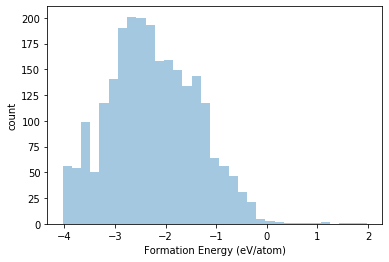

In [30]:
e_form = sns.distplot(mats_df_updated["formation_energy_per_atom"], kde=False)
e_form.set(xlabel = 'Formation Energy (eV/atom)',
          ylabel = 'count')

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Band Gap (eV)')]

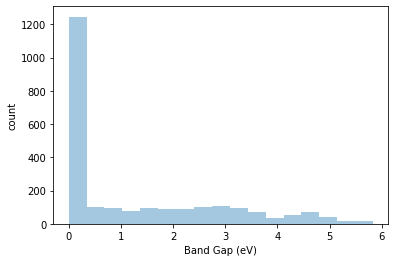

In [31]:
bg_plot = sns.distplot(mats_df_updated["band_gap"], kde=False)
bg_plot.set(xlabel = 'Band Gap (eV)',
          ylabel = 'count')

## Q2 - Publicly available research data

## Q2.1

In [32]:
url="https://ndownloader.figshare.com/files/9158587"
raw = requests.get(url).text
OQMD_data = pd.read_csv(StringIO(raw))

In [33]:
OQMD_data.describe(include = 'all')

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
count,5329,5329,5329,5329,5329,5329,5329.000000,5329.000000,5329,5329,...,5329,5329,5329,5329,5329,5329,5329,5329,5329,5329
unique,5329,73,73,2,7,7,NaN,NaN,5,2847,...,910,4082,945,2142,2145,2581,125,126,124,4157
top,SbKO3,B,B,False,not balanced,not balanced,NaN,NaN,cubic,-,...,0.000,-,0.000,-,-,-,90.0,90.0,90.0,-
freq,1,73,73,5107,1881,1881,NaN,NaN,3253,53,...,1148,53,4132,53,53,53,4953,4953,4953,415
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.974656,0.817846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.337139,0.247479,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.270000,0.270000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.690000,0.630000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.930000,0.770000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.180000,0.950000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q2.2

In [34]:
len(OQMD_data['Chemical formula'])

5329

## Q2.3

In [35]:
sum = 0
for i in OQMD_data:
    sum += 1
    print(i)
print('\n*total columns* ', sum)

Chemical formula
A
B
In literature
Valence A
Valence B
Radius A [ang]
Radius B [ang]
Lowest distortion
Formation energy [eV/atom]
Stability [eV/atom]
Magnetic moment [mu_B]
Volume per atom [A^3/atom]
Band gap [eV]
a [ang]
b [ang]
c [ang]
alpha [deg]
beta [deg]
gamma [deg]
Vacancy energy [eV/O atom]

*total columns*  21


## Q2.4

In [36]:
data_column = 'Formation energy [eV/atom]'
OQMD_data[data_column].apply(type).value_counts

<bound method IndexOpsMixin.value_counts of 0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
5324    <class 'str'>
5325    <class 'str'>
5326    <class 'str'>
5327    <class 'str'>
5328    <class 'str'>
Name: Formation energy [eV/atom], Length: 5329, dtype: object>

In [47]:
#remove '-' characters
clean_OQMD = (OQMD_data[OQMD_data[data_column] != '-'])
clean_column = clean_OQMD["Formation energy [eV/atom]"]
#replace column of strings with column of floats
wrangled_OQMD = clean_OQMD.drop(data_column, axis=1).join(clean_column.apply(pd.to_numeric))
wrangled_OQMD.to_csv('dft_data.csv')
print('\n*total data points remaining*: ', len(wrangled_OQMD["Formation energy [eV/atom]"]))


*total data points remaining*:  5276


## Q2.5

Text(0, 250, 'Mean: -1.68\nStd: 0.98')

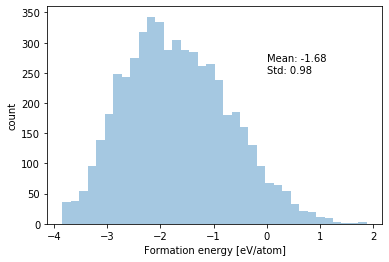

In [38]:
e_form_2 = sns.distplot(wrangled_OQMD["Formation energy [eV/atom]"], kde=False)
e_form_2.set(ylabel = 'count')
e_form_2.text(0,250,"Mean: -1.68\nStd: 0.98")

## Q3 - Comparing data sets

## Q3.1

In [48]:
mats = mats_df_updated['pretty_formula']
oqmd = wrangled_OQMD['Chemical formula']
print('Unique shared formulas: ', len(set(mats).intersection(oqmd)))

Unique shared formulas:  1196


In [40]:
intersection = pd.merge(wrangled_OQMD,mats_df_updated,left_on=['Chemical formula'], 
         right_on=['pretty_formula'], how = "inner")
intersection['Formation energy [eV/atom]'].describe()

count    2114.000000
mean       -2.063785
std         0.887593
min        -3.844000
25%        -2.781000
50%        -2.127000
75%        -1.405500
max         1.110000
Name: Formation energy [eV/atom], dtype: float64

In [41]:
intersection['formation_energy_per_atom'].describe()

count    2114.000000
mean       -2.335170
std         0.847051
min        -4.037959
25%        -2.934984
50%        -2.387762
75%        -1.746146
max         1.978078
Name: formation_energy_per_atom, dtype: float64

Text(0, 110, 'OQMD:\nMean=-2.06\nStd=0.89')

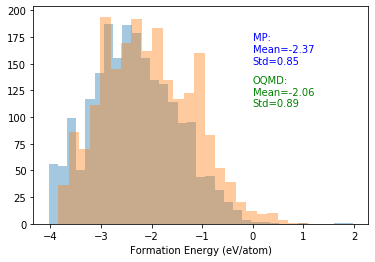

In [42]:
plot_mats_proj = sns.distplot(intersection['formation_energy_per_atom'], kde = False, axlabel = "Formation Energy (eV/atom)")
plot_oqmd = sns.distplot(intersection['Formation energy [eV/atom]'], kde = False, axlabel = "Formation Energy (eV/atom)")
plot_mats_proj.text(0,150,"MP:\nMean=-2.37\nStd=0.85", color="b")
plot_oqmd.text(0,110,"OQMD:\nMean=-2.06\nStd=0.89", color="g")

In [43]:
# Check variances to determine which t test to use

In [44]:
np.var(intersection['formation_energy_per_atom'])

0.7171554507380089

In [45]:
np.var(intersection['Formation energy [eV/atom]'])

0.7874491137651499

In [46]:
stats.ttest_ind(intersection['Formation energy [eV/atom]'], intersection['formation_energy_per_atom'], equal_var=False)

Ttest_indResult(statistic=10.170081089674078, pvalue=5.094696175640705e-24)

**Conclusion**

Given the low p-value of ~6e-29, we can conclude that there is a significant difference in the mean formation energy in these two data sets. It is possible that the DFT functionals used to compute the formation energies compounds in the OQMD database tend to underestimate the energy values relative to the values in the materials project. This would make sense assuming that the energies in the Mats Project are calculated individually while OQMD database values all go through the HT-DFT method, which might make some accuracy sacrifices for the sake of performance.